# <font color = 'orange'>Expectation Maximization Algorithm</font>
___

**EM algorithm** is often used for **clustering** data in Machine Learning.\
It's known as **soft-clustering method** *(Unlike K-Means and K-Medians)*, or method that uses **probability** to decide which point belongs to which cluster.\
Usually, we assume that given data lies in **clusters** within **normal distribution**(Gaussian distribution).

## What is EM algorithm exactly?

EM algorithm is something that helps us to cluster data using Gaussian Mixture Models.\
There is a variable called latent (invisible) in this algorithm. The variable contains our means of each gaussian($\mu$), standart deviations of each gaussian($\sigma$ or covariance matrices) and probabilities of each gaussian ($\pi$)\
(Roughly speaking, gaussian = cluster)\
\
The algorithm itself consists of two steps: **Expectation** is the first, and **Maximization** is the second one.
- In Expectation Step we compute likelihood of point being in each cluster
- In Maximization Step we compute our new parameters, in other words, maximize them

___
## Maths for 1-dimensional example

The data: <font size = 4.5>$x = \begin{bmatrix} \
x_1 \\
x_2 \\
\text{...} \\
x_p \\
\end{bmatrix}$</font>
\
(Where $p$ is the number of datapoints)\
\
The variables:
<font size = 4.5>$\mu = \begin{bmatrix}\
\mu_1 \\
\mu_2 \\
\text{...} \\
\mu_n \\
\end{bmatrix} \space\space\space \
\sigma = \begin{bmatrix} \
\sigma_1 \\
\sigma_2 \\
\text{...} \\
\sigma_n \\
\end{bmatrix} \space\space\space \
\pi = \begin{bmatrix} \
\pi_1 \\
\pi_2 \\
\text{...}\\
\pi_n \\
\end{bmatrix}$
</font>\
\
*(Where $n$ is the number of our clusters)*\
\
And now we have $Z$ as the latent variable: 
<font size = 4.5>
$Z = \begin{bmatrix} \
\mu \\
\sigma \\
\pi \\
\end{bmatrix}$
</font>

### <font color = 'orange'>The algorithm:</font>
**Preparation:** The first thing you need to do is to randomly choose parameters in variable $Z$ for each Gaussian.\
\
Then let's start from **Expectation**.
 - **1 step**: For each data point find probability of each cluster having this point: \
 Probability density function (where $c$ is the parameters of our cluster):\
 <font size = 4.5>$P(x_i | c) = \frac{1}{\sqrt{2\pi\sigma_c^2}}exp(-\frac{{(x_i-\mu_c)}^2}{2\sigma^2_c})$</font>
 - **2 step**: For each data point find conditional probability of belonging to each cluster: \
 Formula of conditional probability:\
 <font size = 4.5>$c_i = P(c | x_i) = \frac{P(x_i|c)\pi_c}{\sum ^{S} _{s = 1} P(x_i|s)\pi_s}$</font>\
 (where $c$ and $s$ are parameters of clusters, $c_i$ is the probablity of the point belonging to cluster $c$ and S is the number of all clusters)\
 \
 For our first iteration we need probability($\pi_c$) to be distributed equally amongst all of the clusters:  $\pi_c = \frac{1}{S}$ and frequently isn't maximized(otherwise there are cases in which one Gaussian can grab every point

And then go to **Maximization**.
- **1 step**:\
Calculate new mean for each Gaussian(we use probability as weights):\
<font size = 4.5>$\mu_c = \frac{c_1x_1 + c_2x_2 + \space\text{...}\space + c_n x_n}{c_1 + c_2 + \space\text{...}\space + c_n} $</font>
- **2 step**:\
Calculate new varience (take the square root for std) for each Gaussian:\
<font size = 4.5>$\sigma^2_c = \frac{c_1(x_1 - \mu_c)^2 + c_2(x_2-\mu_c)^2 + \space\text{...}\space + c_n(x_n - \mu_c)^2 }{c_1 + c_2 + \space\text{...}\space + c_n} $</font>
- **3 step (not necessary)**:\
Calculate the probability of a Gaussian:\
<font size = 4.5>$\pi_c = \frac{c_1 + c_2 + \space\text{...}\space + c_n}{n}$</font>\
\
\
If the parameters didn't coverge, then our new values of parameters are taken and we repeat calculations one more time, starting from **Expectation**. 

## Application of 1-d EM

In [2]:
#Importing all needed libraries, also setting matplotlib to 'inline' mode
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

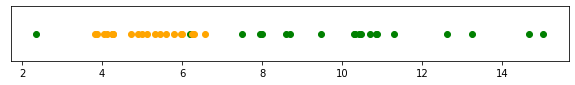

In [3]:
#Random seed for same results
np.random.seed(149)

#Creating dataset: choosing means and deviations for two clusters
c1_m = 10
c1_std = 3
c2_m = 5
c2_std = 0.9

#Then creating points for dataset, we use 20 from each normal distribution:
c1 = np.random.normal(c1_m, c1_std, size = 20)
c2 = np.random.normal(c2_m, c2_std, size = 20)

#Plot the dataset
fig= plt.figure(figsize = (10, 1))
ax = plt.axes()
ax.set_yticks([])
ax.scatter(c1, [1 for i in range(len(c1))], c = 'green')
ax.scatter(c2, [1 for i in range(len(c2))],c = 'orange')

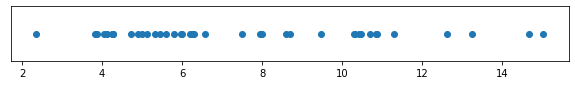

In [4]:
#Сreating one dataset from two groups of points
allpoints = np.concatenate((c1,c2))

#Plotting the dataset without dividing it into clusters
fig1= plt.figure(figsize = (10, 1))
ax1 = plt.axes()
ax1.set_yticks([])
ax1.scatter(allpoints,[1 for i in range(len(allpoints))])

In [5]:
#Then we calculate the original mean and deviation from points we created
param = {'cluster1': [np.mean(c1), np.std(c1)], 'cluster2': [np.mean(c2), np.std(c2)]}
param

{'cluster1': [9.977604707333839, 2.831846487044749],
 'cluster2': [5.07841323580085, 0.862971796057043]}

In [6]:
#Let's save our parameters in variables and then plot the distributions
c1_m_p = param['cluster1'][0]
c1_std_p = param['cluster1'][1]
c2_m_p = param['cluster2'][0]
c2_std_p = param['cluster2'][1]

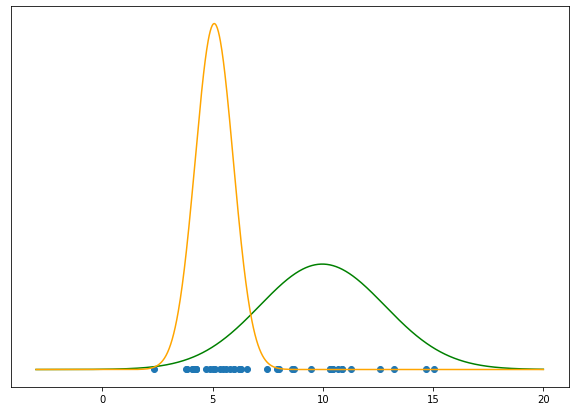

In [7]:
#Plotting distributions with a dataset
fig2= plt.figure(figsize = (10, 7))
ax2 = plt.axes()
ax2.set_yticks([])
ax2.scatter(allpoints,[0.0005 for i in range(len(allpoints))])
x = np.linspace(-3, 20, 1000)
ax2.plot(x, stats.norm(c1_m_p, c1_std_p).pdf(x), c = 'green')
ax2.plot(x, stats.norm(c2_m_p, c2_std_p).pdf(x), c = 'orange')

In [8]:
#Creating Expectation Maximization Algorithm
def EM1d (max_iter, data, cl_num, tol): 
    '''
    -----------------------------------------------------------
    EM Algorithm for 1-dimensional dataset
    
    max_iter: maximum number of iterations
    data: dataset
    cl_num: number of mixture models you want to create
    tol: tolerance, or limit of convergence
    
    
    Description: It's used to find parameters of mixture models 
                         we want to fit to our data
    
    Example: 
    means, stds = EM1d(iterations = 100, data = dataset,
                        clusters_num = 2,tolerance = 0.001) 
    
    ------------------------------------------------------------
    '''
  
    #Preparation: randomly initialize means and standart deviations
    means = np.random.random(cl_num)*5
    stds = np.random.random(cl_num)*5
    
    #algorithm is algorithm, so we add the iterations
    for it in range(max_iter):
        
    #Expectation
        #1 step: Calculating likelihoods using probability density function
        lhs = []
        for cluster in range(cl_num):
            #get likelihoods of one cluster
            likelihood_tocluster = stats.norm(means[cluster], stds[cluster]).pdf(allpoints)
            #add the likelihoods to array of other clusters' likelihoods
            lhs.append(likelihood_tocluster)
        
        #find total likelihoods of every data point:
        #first we set total likelihoods to first cluster likelihoods
        lhs_total = lhs[0]
        for cluster in range(1, cl_num):
            #and then add other clusters' likelihoods
            lhs_total = lhs_total + lhs[cluster]
        #so, we found all the likelihoods
        
        #2 step:
        #For every point lets find weights or,
        #as I called them earlier, "conditional probabilities of belonging to each cluster"
        weights = []
        for cluster in range(cl_num):
            #weights for one cluster
            weight_clust = np.divide(lhs[cluster],lhs_total)
            #add to array of other clusters' weights
            weights.append(weight_clust)
            
    #Maximization
        #then we find new means and standart deviations:
        new_means = []
        new_stds = []
        for cluster in range(cl_num):
            #find mean for one cluster
            new_mean_clust = np.sum(allpoints * weights[cluster])/np.sum(weights[cluster])
            #add it to other clusters' means
            new_means.append(new_mean_clust)
            
            #find variance for one cluster
            new_variance = np.sum(weights[cluster] * np.power((allpoints - new_mean_clust),2)) / np.sum(weights[cluster])
            #calculate the square root - standart deviation
            new_std_clust = math.sqrt(new_variance)
            #also add it to other clusters' standart deviations
            new_stds.append(new_std_clust)
            
        #Let's calculate the tolerance:
        #My way is to find the maximum amongst all the absolute differences of means and standart deviations
        delta_mean = max(abs(np.subtract(means, new_means)))
        delta_std = max(abs(np.subtract(stds, new_stds)))
        #and if they are less or equal than the tolerance, we stop the algorithm
        if delta_mean<=tol and delta_std<=tol :
            break
        #but if they aren't, we take our new data and perform the next iteration
        means = new_means
        stds = new_stds
    #At the end, just return the parameters
    return means, stds

In [12]:
#algorithm in use
means, stds = EM1d(max_iter = 25, data = allpoints, cl_num = 2, tol = 0.0001)
#let's print parameters
print(means)
print(stds)

[4.989111714482643, 10.145356884715428]
[1.0735169942265699, 2.530255548793509]


In [10]:
#And these are the parameters computed in the beginning
print(param)
#they are almost the same

{'cluster1': [9.977604707333839, 2.831846487044749], 'cluster2': [5.07841323580085, 0.862971796057043]}


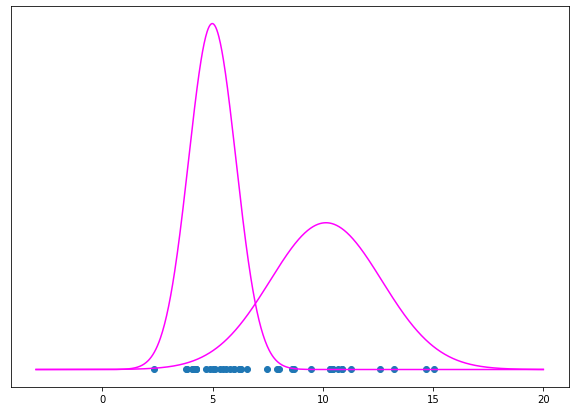

In [13]:
#Let's plot distributions with parameters from the algorithm
fig3= plt.figure(figsize = (10, 7))
ax3 = plt.axes()
ax3.set_yticks([])
ax3.scatter(allpoints,[0.0005 for i in range(len(allpoints))])
x = np.linspace(-3, 20, 1000)
for i in range(len(means)):
    ax3.plot(x, stats.norm(means[i], stds[i]).pdf(x), c = 'magenta')

And this is the end of 1-dimensional **Expectation Maximization** Algorithm!

___
## Math for 2- or more dimensional example

 The data is represented this way: <font size = 4.5>$X = \begin{bmatrix} \
 x_1 & y_1 & z_1 & \text{.} & k_1\\
 x_2 & y_2 & z_2 & \text{.} & k_2\\
 \text{.} & \text{.} & \text{.} & \text{.} & \text{.}\\
 x_p & y_p & z_p & \text{.} & k_p\\
 \end{bmatrix}$</font>\
 (where $k$ is the last dimension's variable)

Pretty much everything remains the same, only instead of *standart deviation* **varience-covarience matrix** is found.\
So what is the **varience-covarience matrix**?\
The **varience-covarience matrix** is the matrix which contains both **variences** (along the diagonal) and **covariences** (along the sides) in one matrix.\
\
<font size = 4.5>$\Sigma = \begin{bmatrix}\
\frac{\sum x_1^2}{P} & \frac{\sum x_1x_2}{P} & \text{.} & \frac{\sum x_1x_d}{P} \\
\frac{\sum x_2x_1}{P} & \frac{\sum x_2^2}{P} & \text{.} & \frac{\sum x_2x_d}{P} \\
\text{.} & \text{.} & \text{.} & \text{.} \\
\frac{\sum x_dx_1}{P} & \frac{\sum x_dx_2}{P} & \text{.} & \frac{\sum x_d^2}{P} \\
\end{bmatrix}$</font>\
\
Where $P$ is the number of data points\
$d$ is the number of dimensions\
$x_i$ is the deviation score of the ith variable, for example:
$x_1 = (X_i - \overline X$), $x_2 = (Y_i - \overline Y)$, $x_3 = (Z_i - \overline Z)$ and $x_d = (K_i - \overline K)$

 The variables: <font size = 4.5>$\mu = \begin{bmatrix}\
 \mu_{1,1} & \mu_{1,2} & \text{.} & \mu_{1,d} \\
 \mu_{2,1} & \mu_{2,2} & \text{.} & \mu_{2,d} \\
 \text{.} & \text{.} & \text{.} & \text{.} \\
 \mu_{n,1} & \mu_{n,2} & \text{.} & \mu_{n,d}
 \end{bmatrix} \space\space\space \
 \Sigma = \begin{bmatrix} \
 \Sigma_1 \\
 \Sigma_2 \\
 \text{...} \\
 \Sigma_n
 \end{bmatrix} \space\space\space \
 \pi = \begin{bmatrix} \
 \pi_1 \\
 \pi_2 \\
 \text{...} \\
 \pi_n \\
 \end{bmatrix}$</font> \
 \
 where $n$ is the number of gaussians, and $d$ is the number of dimensions
 \
 \
 And now we have $Z$ such as:
 <font size = 4.5>$Z = \begin{bmatrix} \
 \mu \\
 \Sigma \\
 \pi
 \end{bmatrix}$</font>
 

### <font color = 'orange'>The algorithm:</font>
**Preparation:** randomly initialize the parameters and covarience matrices\
\
Let's start from **Expectation**:
- **1 step**: For each data point find probability of each cluster having this point: \
 Probability density function (where $c$ is parameters of our cluster):\
<font size = 4.5>$P(\vec x | c) = \frac{1}{\sqrt{2\pi|\Sigma_c|}} exp(-\frac{1}{2} (\vec x_i - \vec \mu_c)^T \Sigma^{-1} (\vec x_i - \vec \mu_c)\space)$</font>
- **2 step**:  For each data point find conditional probability of belonging to each cluster: \
 Formula of conditional probability:\
 <font size = 4.5>$с_i = P(c|\vec x) = \frac{P(\vec x | c)\pi_c}{\sum _{s = 1} ^{S} P(\vec x| s)\pi_s}$</font>\
 (where $c$ and $s$ are parameters of clusters, $c_i$ is the probablity of the point belonging to cluster $c$ and S is the number of all clusters)\
 \
 For our first iteration we need probability($\pi_c$) to be distributed equally amongst all of the clusters:  $\pi_c = \frac{1}{S}$ and frequently isn't maximized(otherwise there are cases in which one Gaussian can grab every point)

And then go to **Maximization**.
- **1 step**:\
Calculate new mean for each Gaussian(we use probability as weights):\
<font size = 4.5>$\mu_c ^{(j)} = \sum _{i = 1}^{n} (\frac{c_i}{\pi_c n}) x_{i,j}$</font>


- **2 step**:\
Calculate the varience-covarience matrix\
<font size = 4.5>$\Sigma_c = \begin{bmatrix}\
\Sigma_{1,1} & \Sigma_{1,2} & \text{.} & \Sigma_{1,d} \\
\Sigma_{2,1} & \Sigma_{2,2} & \text{.} & \Sigma_{2,d} \\
\text{.} & \text{.} & \text{.} & \text{.} &\\
\Sigma_{d,1} & \Sigma_{d,2} & \text{.} & \Sigma_{d,d} \\
\end{bmatrix}$</font>\
\
And:\
<font size = 4.5>$\Sigma_c^{(j,k)} = \sum _{i = 1}^{n} (\frac{c_i}{\pi_c n}) (x_{i,j} - \mu_c^{(j)})(x_{i,k} - \mu_c^{(k)})$</font>


- **3 step**(not necessary):\
Calculate the prior probability of choosing the gaussian:\
<font size = 4.5>$\pi_c = \frac{1}{n} \sum _{i = 1}^{N} P(c| \vec x)$</font>\
\
\
If the parameters didn't coverge, then our new values of parameters are taken and we repeat calculations one more time, starting from **Expectation**. 